<a href="https://colab.research.google.com/github/SteFuh/hello-world/blob/master/Assignment_3_Stephan_Fuhrmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first: import pyndas and matplotlib packages
import pandas as pd
import matplotlib.pyplot as plt

## importing data and preparing dataset: 

In [2]:
# load datasets
london = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/London_weather_2015-19.csv")
singapore = pd.read_csv("https://raw.githubusercontent.com/ds4geo/ds4geo/master/data/timeseries/meteo/Singapore_weather_2015-19.csv")

In [3]:
#setting column "date" as index
london.index = london["date"]
# check Dtype of index 
london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 2015-01-01 to 2019-12-31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1821 non-null   object 
 1   mean_temp (deg C)   1821 non-null   float64
 2   min_temp (deg C)    1821 non-null   float64
 3   max_temp (deg C)    1821 non-null   float64
 4   mean_pressure (mb)  1821 non-null   float64
 5   mean_humidity (%)   1821 non-null   float64
 6   mean_wind (ms-1)    1820 non-null   float64
 7   precip_sum (mm)     1821 non-null   float64
 8   month               1821 non-null   object 
 9   month-year          1821 non-null   object 
 10  year                1821 non-null   int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 170.7+ KB


In [4]:
# and convert Dtype to datetime: 
london["date"] = pd.to_datetime(london.date)
# check again to see if it worked
london.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 2015-01-01 to 2019-12-31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1821 non-null   datetime64[ns]
 1   mean_temp (deg C)   1821 non-null   float64       
 2   min_temp (deg C)    1821 non-null   float64       
 3   max_temp (deg C)    1821 non-null   float64       
 4   mean_pressure (mb)  1821 non-null   float64       
 5   mean_humidity (%)   1821 non-null   float64       
 6   mean_wind (ms-1)    1820 non-null   float64       
 7   precip_sum (mm)     1821 non-null   float64       
 8   month               1821 non-null   object        
 9   month-year          1821 non-null   object        
 10  year                1821 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 170.7+ KB


In [5]:
# the same is done for singapore 
singapore.index = singapore["date"]
singapore["date"] = pd.to_datetime(singapore.date)
singapore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                1826 non-null   datetime64[ns]
 1   mean_temp (deg C)   1826 non-null   float64       
 2   min_temp (deg C)    1826 non-null   float64       
 3   max_temp (deg C)    1826 non-null   float64       
 4   mean_pressure (mb)  1826 non-null   float64       
 5   mean_humidity (%)   1826 non-null   float64       
 6   mean_wind (ms-1)    1826 non-null   float64       
 7   precip_sum (mm)     1826 non-null   float64       
 8   month               1826 non-null   object        
 9   month-year          1826 non-null   object        
 10  year                1826 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 171.2+ KB


Let's have a quick look at the hottest temperature ever measured in the measurement period: 


In [6]:
# lets have a quick look at the hottest temperature ever measured in the measurement period: 
print("The hottest Temperature measured in London between 2015 and 2019 was", london["max_temp (deg C)"].max(),"°C",)
print("The hottest Temperature measured in Singapore between 2015 and 2019 was", singapore["max_temp (deg C)"].max(),"°C",)

The hottest Temperature measured in London between 2015 and 2019 was 37.9 °C
The hottest Temperature measured in Singapore between 2015 and 2019 was 35.0 °C


Thats suprising (at least for me)! Let's check out the coldest Temperature: 

In [7]:
 print("The hottest Temperature measured in London between 2015 and 2019 was", london["min_temp (deg C)"].min(),"°C",)
print("The hottest Temperature measured in Singapore between 2015 and 2019 was", singapore["min_temp (deg C)"].min(),"°C",)

The hottest Temperature measured in London between 2015 and 2019 was -8.2 °C
The hottest Temperature measured in Singapore between 2015 and 2019 was 21.3 °C


Creating a function that extracts the day of the year and returns it

In [8]:
def frac(date):                                                              # returns a fractional day independent of the year
  return date.dayofyear

Next, we could individually create a column an additional column that contains the day of the year in the datasets: 


In [9]:
#london["dayofyear"] = [frac(i) for i in london["date"]]                     # creating a new column "day of year" in the two datasets 
#singapore["dayofyear"] = [frac(i) for i in singapore["date"]]

or we define a function that does the same thing:

In [10]:
def dayofyear(dataframe):                                                
   dataframe["dayofyear"] = [frac(i) for i in dataframe["date"]]              # here we call the function from before and put it in a for loop
   return dataframe["dayofyear"]                                              # the return statement makes the output of the function available in the global scope (outside of the function)

and here we go: 

In [11]:
dayofyear(london)
dayofyear(singapore)

date
2015-01-01      1
2015-01-02      2
2015-01-03      3
2015-01-04      4
2015-01-05      5
             ... 
2019-12-27    361
2019-12-28    362
2019-12-29    363
2019-12-30    364
2019-12-31    365
Name: dayofyear, Length: 1826, dtype: int64

Plotting the mean temperatures of London and Singapore

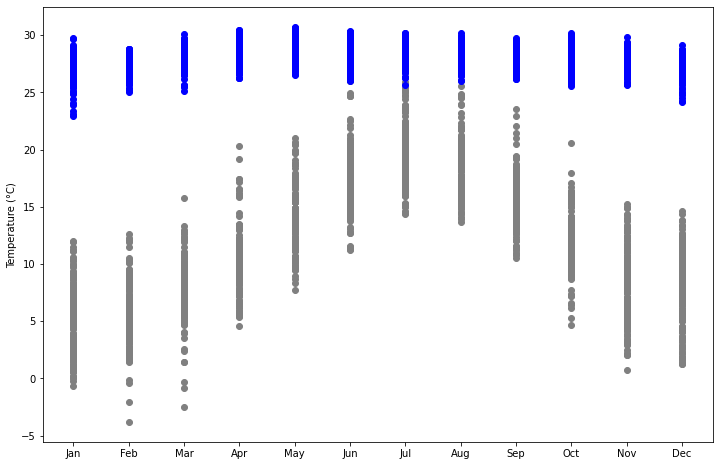

In [12]:
london.index = london["year"]
singapore.index = singapore["year"]

fig, ax = plt.subplots(figsize=(12,8))

ax2 = ax.twiny()

for individual_year in london["year"].unique():
  split = london.loc[individual_year]
  ax.scatter(split["month"], split["mean_temp (deg C)"],color = "gray")

for individual_year in singapore["year"].unique():
  split = singapore.loc[individual_year]
  ax2.scatter(split["month"], split["mean_temp (deg C)"], color = "blue")
  ax2.axis('off')

ax.set_ylabel("Temperature (°C)")
plt.show()